In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time
import timeit

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
#Gather Data
df=pd.read_csv('sales_data_EDA_final.csv')
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0,0.252232,249.8092,23.0,6.417137,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.920000,1,0.268136,48.2692,13.0,3.964431,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500000,0,0.255913,141.6180,23.0,5.632405,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,13.650000,1,0.233562,57.6588,35.0,3.742265,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,12.857645,0,0.503272,107.7622,37.0,6.525631,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,6.865000,0,0.384362,214.5218,35.0,6.002014,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
7993,8.380000,1,0.360838,108.1570,20.0,4.160967,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
7994,10.600000,0,0.327686,85.1224,18.0,4.958269,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
7995,7.210000,1,0.525625,103.1332,13.0,5.472011,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [3]:
#define dependant and independant variables
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [4]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [5]:
x_train.shape

(6397, 27)

In [11]:
%%timeit
#train the model
model=RandomForestRegressor(n_estimators=200)
model.fit(x_train,y_train)

10.2 s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
#evaluate the model
#training_data
print('#'*50)
print('Training Data Evaluation')
print('#'*50)
y_pred=model.predict(x_train)

r2=r2_score(y_train,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_train,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_train,y_pred)
print('MAE==',mae)

print('#'*50)
print('Testing Data Evaluation')
print('#'*50)

y_pred=model.predict(x_test)

r2=r2_score(y_test,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_test,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE==',mae)

##################################################
Training Data Evaluation
##################################################
R2 Score== 0.9552916851737587
MSE== 0.05646235812794021
MAE== 0.18544047488980253
##################################################
Testing Data Evaluation
##################################################
R2 Score== 0.6643685001217626
MSE== 0.4059591972638172
MAE== 0.4981259773540891


In [8]:
# Low Bias and High Variance >> Overfit Model

In [19]:
 model.feature_importances_

array([0.04460182, 0.00634392, 0.07823182, 0.38629049, 0.11665998,
       0.00217323, 0.00210384, 0.00352949, 0.00381946, 0.00412826,
       0.00538437, 0.00155665, 0.0031995 , 0.004683  , 0.00290249,
       0.00165979, 0.00096269, 0.00517744, 0.00314089, 0.00148211,
       0.00365505, 0.00499505, 0.00328852, 0.00263699, 0.14941981,
       0.04807596, 0.10989738])

In [20]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [41]:
s1=pd.Series(model.feature_importances_,index=x.columns)
s1

Item_Weight                        0.044602
Item_Fat_Content                   0.006344
Item_Visibility                    0.078232
Item_MRP                           0.386290
Outlet_Establishment_Year          0.116660
Item_Type_Breads                   0.002173
Item_Type_Breakfast                0.002104
Item_Type_Canned                   0.003529
Item_Type_Dairy                    0.003819
Item_Type_Frozen Foods             0.004128
Item_Type_Fruits and Vegetables    0.005384
Item_Type_Hard Drinks              0.001557
Item_Type_Health and Hygiene       0.003199
Item_Type_Household                0.004683
Item_Type_Meat                     0.002902
Item_Type_Others                   0.001660
Item_Type_Seafood                  0.000963
Item_Type_Snack Foods              0.005177
Item_Type_Soft Drinks              0.003141
Item_Type_Starchy Foods            0.001482
Outlet_Size_Medium                 0.003655
Outlet_Size_Small                  0.004995
Outlet_Location_Type_Tier 2     

<AxesSubplot:>

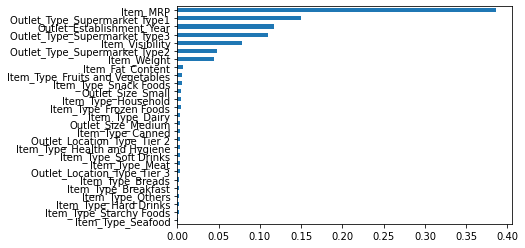

In [43]:
s1.sort_values().plot(kind='barh')

In [44]:
s1.sort_values()

Item_Type_Seafood                  0.000963
Item_Type_Starchy Foods            0.001482
Item_Type_Hard Drinks              0.001557
Item_Type_Others                   0.001660
Item_Type_Breakfast                0.002104
Item_Type_Breads                   0.002173
Outlet_Location_Type_Tier 3        0.002637
Item_Type_Meat                     0.002902
Item_Type_Soft Drinks              0.003141
Item_Type_Health and Hygiene       0.003199
Outlet_Location_Type_Tier 2        0.003289
Item_Type_Canned                   0.003529
Outlet_Size_Medium                 0.003655
Item_Type_Dairy                    0.003819
Item_Type_Frozen Foods             0.004128
Item_Type_Household                0.004683
Outlet_Size_Small                  0.004995
Item_Type_Snack Foods              0.005177
Item_Type_Fruits and Vegetables    0.005384
Item_Fat_Content                   0.006344
Item_Weight                        0.044602
Outlet_Type_Supermarket Type2      0.048076
Item_Visibility                 

In [45]:
drop_list=['Item_Type_Seafood','Item_Type_Starchy Foods','Item_Type_Hard Drinks','Item_Type_Others','Item_Type_Breakfast','Item_Type_Breads','Outlet_Location_Type_Tier 3','Item_Type_Meat','Item_Type_Soft Drinks','Item_Type_Health and Hygiene','Outlet_Location_Type_Tier 2','Item_Type_Canned','Outlet_Size_Medium','Item_Type_Dairy','Item_Type_Frozen Foods','Item_Type_Household','Outlet_Size_Small','Item_Type_Snack Foods','Item_Type_Fruits and Vegetables','Item_Fat_Content']
x=x.drop(drop_list,axis=1)

In [46]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,0.252232,249.8092,23.0,1,0,0
1,5.920000,0.268136,48.2692,13.0,0,1,0
2,17.500000,0.255913,141.6180,23.0,1,0,0
3,13.650000,0.233562,57.6588,35.0,1,0,0
4,12.857645,0.503272,107.7622,37.0,0,0,1
...,...,...,...,...,...,...,...
7992,6.865000,0.384362,214.5218,35.0,1,0,0
7993,8.380000,0.360838,108.1570,20.0,1,0,0
7994,10.600000,0.327686,85.1224,18.0,1,0,0
7995,7.210000,0.525625,103.1332,13.0,0,1,0


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
#evaluate the model
#training_data
print('#'*50)
print('Training Data Evaluation')
print('#'*50)
y_pred=model.predict(x_train)

r2=r2_score(y_train,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_train,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_train,y_pred)
print('MAE==',mae)

print('#'*50)
print('Testing Data Evaluation')
print('#'*50)

y_pred=model.predict(x_test)

r2=r2_score(y_test,y_pred)
print('R2 Score==',r2)

mse=mean_squared_error(y_test,y_pred)
print('MSE==',mse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE==',mae)

##################################################
Training Data Evaluation
##################################################
R2 Score== 0.9550435255736328
MSE== 0.05603140017083722
MAE== 0.18502841436874665
##################################################
Testing Data Evaluation
##################################################
R2 Score== 0.6505407032301279
MSE== 0.4448986184128612
MAE== 0.5192730778747449
